In [15]:
# Imports
import matplotlib.pyplot as plt
import matplotlib.animation
import numpy as np
import pickle as pkl
from matplotlib.ticker import (LogLocator)
from IPython.display import HTML
matplotlib.rcParams.update({'font.size': 14})

In [16]:
# Load PINN outputs
with open('pinn_loss.pkl', 'rb') as file:
    pinn_loss = pkl.load(file)
    
with open('boundary_loss.pkl', 'rb') as file:
    boundary_loss = pkl.load(file)
    
with open('predictions.pkl', 'rb') as file:
    predictions = pkl.load(file)
    
with open('f_boundary.pkl', 'rb') as file:
    f_boundary = pkl.load(file)
    
with open('p.pkl', 'rb') as file:
    p = pkl.load(file)
    
with open('T.pkl', 'rb') as file:
    T = pkl.load(file)

In [17]:
# Get properties
size = int(np.sqrt(predictions.shape[0]))
epochs = int(np.sqrt(predictions.shape[2]))

# Take out of logspace
T = np.exp(T)
p = np.exp(p)
f_boundary = np.exp(f_boundary)
# predictions = np.exp(predictions)
final_predict = predictions[:, :, -1].reshape((size, size))
final_predict = np.exp(final_predict)

# Check data
print(f'F_boundary shape: {f_boundary.shape}, max: {np.max(f_boundary)}')
print(f'Predictions shape: {predictions.shape}, max: {np.max(predictions[:, :, -1].reshape((size, size)).T[:-1, -1])}')
print(f'Final_predict shape: {final_predict.shape}, max: {np.max(final_predict[:-1, -1])}')

F_boundary shape: (512, 1), max: 643.4857747295018
Predictions shape: (262144, 1, 500), max: 6.496403694152832
Final_predict shape: (512, 512), max: 9.80834085135414e-16


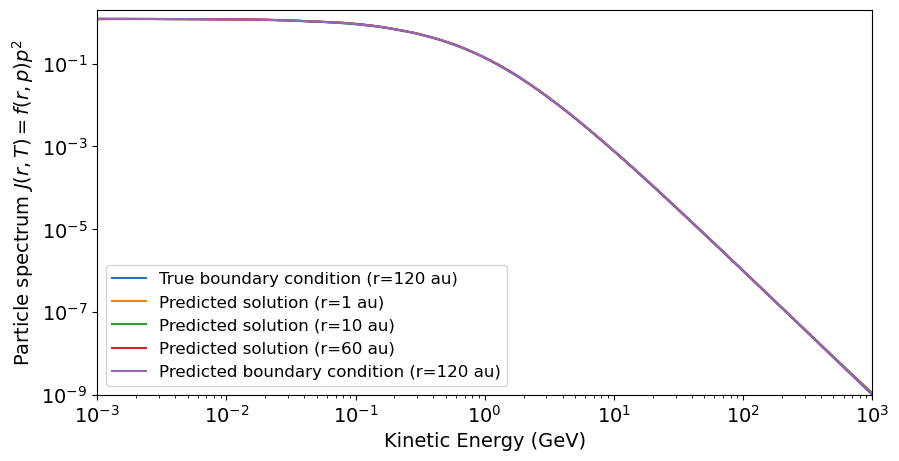

In [37]:
# Plot
fig, ax = plt.subplots(figsize=(10, 5))

ax.loglog(T, f_boundary*(p**2), label='True boundary condition (r=120 au)')
ax.loglog(T[:-1], np.expand_dims(final_predict[0, :-1], axis=1)*(p[:-1]**2), label='Predicted solution (r=1 au)')
ax.loglog(T[:-1], np.expand_dims(final_predict[int(size/12), :-1], axis=1)*(p[:-1]**2), label='Predicted solution (r=10 au)')
ax.loglog(T[:-1], np.expand_dims(final_predict[int(size/2), :-1], axis=1)*(p[:-1]**2), label='Predicted solution (r=60 au)')
ax.loglog(T[:-1], np.expand_dims(final_predict[-1, :-1], axis=1)*(p[:-1]**2), label='Predicted boundary condition (r=120 au)')

ax.set_xlabel("Kinetic Energy (GeV)")
ax.set_ylabel("Particle spectrum $J(r, T) = f(r, p) p^2$")
ax.set_xlim(1e-3, 1e3)
ax.set_ylim(1e-9, 2e0)

ax.legend(prop={'size': 12})
ax.xaxis.set_minor_locator(LogLocator(base=10.0, subs='all'))
ax.yaxis.set_minor_locator(LogLocator(base=10.0, subs='all'))

plt.savefig('prediction.png')

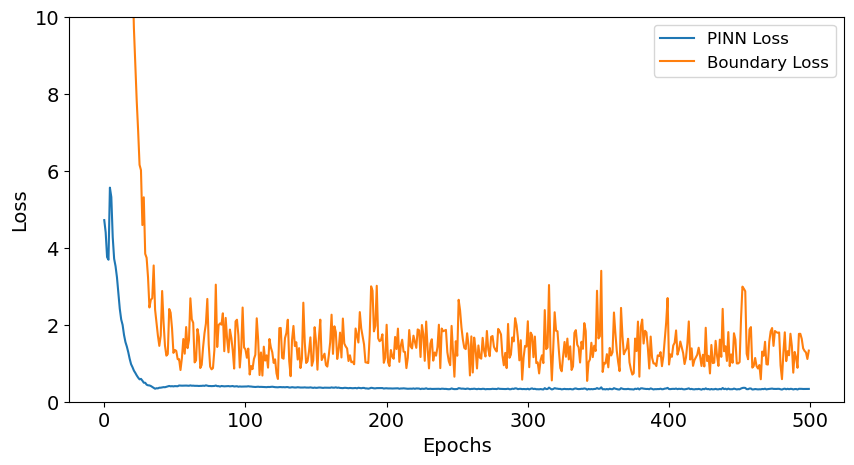

In [25]:
# Plot loss 
fig = plt.figure(figsize=(10, 5))

plt.plot(pinn_loss, label='PINN Loss')
plt.plot(boundary_loss, label='Boundary Loss')
# plt.plot(pinn_loss+boundary_loss, label='Total Loss')

plt.ylim(0, 10)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(prop={'size': 12})
plt.savefig("loss.png")